In [1]:
ls

 Volume in drive D is MY SPACE
 Volume Serial Number is C8ED-0DA1

 Directory of D:\SEMESTER-FILES\SEMESTER-6\PDS\Project\toxic-comment-classification\notebooks

28-03-2025  20:50    <DIR>          .
20-03-2025  19:18    <DIR>          ..
20-03-2025  17:34                 0 .gitkeep
25-03-2025  11:15    <DIR>          .ipynb_checkpoints
28-03-2025  20:50           215,894 Notebook1_shrijeet.ipynb
               2 File(s)        215,894 bytes
               3 Dir(s)  54,791,008,256 bytes free


In [3]:
import sys
sys.prefix

'D:\\PLACEMENTS\\DeepLearningCourse\\TensorFlow\\tensorflow_env'

In [2]:
!pip install seaborn
!pip install matplotlib
!pip install kagglehub[pandas-datasets]
!pip install kagglehub[hf-datasets]
!pip install re 
!pip install nltk
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for re



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
 # All the imports i will be putting here  
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import nltk
from nltk.stem import WordNetLemmatizer

In [3]:
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# train_file = "train.csv"
# test_file = "test.csv"
# test_labels_file = "test_labels.csv"

# train_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.HUGGING_FACE,
#   "julian3833/jigsaw-toxic-comment-classification-challenge",
#   train_file,
#   pandas_kwargs={"encoding": "ISO-8859-1"}
# )
# test_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.HUGGING_FACE,
#   "julian3833/jigsaw-toxic-comment-classification-challenge",
#   test_file,
#   pandas_kwargs={"encoding": "ISO-8859-1"}
# )
# test_labes_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.HUGGING_FACE,
#   "julian3833/jigsaw-toxic-comment-classification-challenge",
#   test_labels_file,
#   pandas_kwargs={"encoding": "ISO-8859-1"}
# )

In [5]:
pwd

'D:\\SEMESTER-FILES\\SEMESTER-6\\PDS\\Project\\toxic-comment-classification\\notebooks'

## Data Ingestion and Preparation 

In [6]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
test_labels_df = pd.read_csv('../data/raw/test_labels.csv')

In [14]:
train_df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [15]:
test_df.shape

(153164, 2)

In [16]:
test_labels_df.shape

(153164, 7)

In [17]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [18]:
test_labels_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [19]:
test_labels_df['toxic'].value_counts()

toxic
-1    89186
 0    57888
 1     6090
Name: count, dtype: int64

In [20]:
test_labels_df.drop('id' , axis=1 , inplace=True)
test_df = pd.concat([test_df , test_labels_df] , axis=1)

In [21]:
test_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [22]:
test_df['toxic'].value_counts()

toxic
-1    89186
 0    57888
 1     6090
Name: count, dtype: int64

In [23]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [24]:
train_df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [25]:
df = pd.concat([train_df , test_df] , ignore_index=True)
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
312730,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
312731,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
312732,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
312733,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [26]:
df.to_csv('../data/raw/full_data.csv' , index=False)

## Data Preprocessing And Cleaning 

In [5]:
df = pd.read_csv('../data/raw/full_data.csv')

In [6]:
df.drop('id' , inplace=True , axis=1)

In [7]:
df.head(2)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [8]:
print(df['toxic'].value_counts())
print(df['severe_toxic'].value_counts())
print(df['obscene'].value_counts())
print(df['threat'].value_counts())
print(df['insult'].value_counts())
print(df['identity_hate'].value_counts())

toxic
 0    202165
-1     89186
 1     21384
Name: count, dtype: int64
severe_toxic
 0    221587
-1     89186
 1      1962
Name: count, dtype: int64
obscene
 0    211409
-1     89186
 1     12140
Name: count, dtype: int64
threat
 0    222860
-1     89186
 1       689
Name: count, dtype: int64
insult
 0    212245
-1     89186
 1     11304
Name: count, dtype: int64
identity_hate
 0    221432
-1     89186
 1      2117
Name: count, dtype: int64


In [9]:
wordnet_lemmatizer = WordNetLemmatizer()

def replaceURL(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|([a-zA-z]+\.(com|net|org|co|us|me|biz)\S*))','url',text)
    return text

def replaceAbbrev(text):
    text = re.sub(r"what's", "what is ",text)    
    text = re.sub(r"\'ve", " have ",text)
    text = re.sub(r"can't", "cannot ",text)
    text = re.sub(r"n't", " not ",text)
    text = re.sub(r"i'm", "i am ",text)
    text = re.sub(r"\'re", " are ",text)
    text = re.sub(r"\'d", " would ",text)
    text = re.sub(r"\'ll", " will ",text)
    text = re.sub(r"\'scuse", " excuse ",text)
    text = re.sub(r"\'s", " ",text)
    return text

def removeUnicode(text):
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r' ', text)       
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    return text

def removeRepeatPattern(text):
    text=re.sub(r'([a-zA-Z])\1{2,}\b',r'\1\1',text)
    text=re.sub(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1',text)
    text=re.sub(r'[ ]{2,}',' ',text)
    return text

def replaceAtUser(text):
    text = re.sub('@[^\s]+','atUser',text)
    return text

def replaceMultiToxicWords(text):
    text = re.sub(r'(fuckfuck)','fuck fuck ',text)
    text = re.sub(r'(f+)( *)([u|*|_]+)( *)([c|*|_]+)( *)(k)+','fuck',text)
    text = re.sub(r'(h+)(a+)(h+)(a+)','ha ha ',text)
    text = re.sub(r'(s+ *h+ *[i|!]+ *t+)','shit',text)
    text = re.sub(r'\b(n+)(i+)(g+)(a+)\b','nigga',text)
    text = re.sub(r'\b(n+)([i|!]+)(g+)(e+)(r+)\b','nigger',text)
    text = re.sub(r'\b(d+)(o+)(u+)(c+)(h+)(e+)( *)(b+)(a+)(g+)\b','douchebag',text)
    text = re.sub(r'([a|@][$|s][s|$])','ass',text)
    text = re.sub(r'(\bfuk\b)','fuck',text)
    return text

def removeNumbers(text):
    text = re.sub("([a-zA-z])5", r"\1s", text)
    text = re.sub("5([a-zA-z])", r"s\1", text)
    text = re.sub("([a-zA-z])1", r"\1i", text)
    text = re.sub("1([a-zA-z])", r"i\1", text)
    text = re.sub("([a-zA-z])0", r"\1o", text)
    text = re.sub("0([a-zA-z])", r"o\1", text)
    text = re.sub(r"\d+", " ", text)
    return text
                  
def replaceMultiPunc(text):
    text=re.sub(r'([!])\1\1{2,}',r' mxm ',text)
    text=re.sub(r'([?])\1\1{2,}',r' mqm ',text)
    text=re.sub(r'([*])\1\1{2,}',r'*',text)
    return text


replace_pun = {}
separators = set('"%&\'()+,-./:;<=>@[\\]^_`{|}~')
for punc in separators:
    replace_pun[punc] = ' '
replace_pun['&']=' and '

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def my_cleaner(s, remove_stop_words=True):
    s = s.lower()
    s=replaceURL(s)
    s=removeUnicode(s)
    s=removeNumbers(s)
    s=replaceAbbrev(s)
    s=replaceMultiToxicWords(s)
    # replacing all whitespace/underscores with a space
    re.sub('_\n\t\r', ' ', s)
    s=replaceMultiPunc(s)
    s=removeRepeatPattern(s)
    
    for punc in separators:
        s= s.replace(punc,replace_pun[punc])                   # remove & replace punctuations
    tokens = nltk.tokenize.word_tokenize(s)                    # split a string into words (tokens)
    tokens = [wordnet_lemmatizer.lemmatize(t).lower() for t in tokens]
    if remove_stop_words:
        tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

def clean(df, col):
    df.loc[:, col] = df.loc[:, col].apply(my_cleaner)
    return df

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shrijeet Kumar\AppData\Local\Temp\ipykernel_14584\1358699948.py:4: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|([a-zA-z]+\.(com|net|org|co|us|me|biz)\S*))','url',text)
C:\Users\Shrijeet Kumar\AppData\Local\Temp\ipykernel_14584\1358699948.py:32: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+','atUser',text)


In [10]:
df.columns 

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [11]:
# CLeaning the entire dataset 
df = clean(df , 'comment_text')

In [12]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww ! match background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,sir hero chance remember page ?,0,0,0,0,0,0
...,...,...,...,...,...,...,...
312730,totally agree stuff nothing long crap,-1,-1,-1,-1,-1,-1
312731,throw field home plate doe get faster throwing...,-1,-1,-1,-1,-1,-1
312732,okinotorishima category see change agree corre...,-1,-1,-1,-1,-1,-1
312733,one founding nation eu germany ha law return q...,-1,-1,-1,-1,-1,-1


In [13]:
# I Noticed that for all the columns of type of comment the -1 value comes together , so let's explore those comments !
df[df['toxic'] == -1]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159571,yo bitch ja rule succesful ever whats hating s...,-1,-1,-1,-1,-1,-1
159572,rfc title fine imo,-1,-1,-1,-1,-1,-1
159573,source * zawe ashton lapland,-1,-1,-1,-1,-1,-1
159574,look back source information updated wa correc...,-1,-1,-1,-1,-1,-1
159575,anonymously edit article,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
312730,totally agree stuff nothing long crap,-1,-1,-1,-1,-1,-1
312731,throw field home plate doe get faster throwing...,-1,-1,-1,-1,-1,-1
312732,okinotorishima category see change agree corre...,-1,-1,-1,-1,-1,-1
312733,one founding nation eu germany ha law return q...,-1,-1,-1,-1,-1,-1


In [28]:
df = df[df['toxic'] != -1]

In [14]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww ! match background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,sir hero chance remember page ?,0,0,0,0,0,0
...,...,...,...,...,...,...,...
312730,totally agree stuff nothing long crap,-1,-1,-1,-1,-1,-1
312731,throw field home plate doe get faster throwing...,-1,-1,-1,-1,-1,-1
312732,okinotorishima category see change agree corre...,-1,-1,-1,-1,-1,-1
312733,one founding nation eu germany ha law return q...,-1,-1,-1,-1,-1,-1


## EDA + Preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312735 entries, 0 to 312734
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   312735 non-null  object
 1   toxic          312735 non-null  int64 
 2   severe_toxic   312735 non-null  int64 
 3   obscene        312735 non-null  int64 
 4   threat         312735 non-null  int64 
 5   insult         312735 non-null  int64 
 6   identity_hate  312735 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 16.7+ MB


In [16]:
df.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

- We can see there is no missing values available in the dataset 

In [17]:
df.duplicated().sum()

np.int64(4246)

In [18]:
df[df.duplicated()]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1569,july utc,0,0,0,0,0,0
2027,july utc,0,0,0,0,0,0
2407,,0,0,0,0,0,0
2835,july utc,0,0,0,0,0,0
3879,please stop adding nonsense wikipedia consider...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
312505,!,0,0,0,0,0,0
312563,fuck,-1,-1,-1,-1,-1,-1
312642,please stop disruptive editing continue vandal...,-1,-1,-1,-1,-1,-1
312663,pressmulti small yes collapsed yes title wikip...,0,0,0,0,0,0


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

- Creating a merged final "category" column where 0 represents Negative Comment and 1 represents positive or neutral comment.

In [21]:
import numpy as np

df['category'] = np.where(
    (df['identity_hate'] == 1) | (df['insult'] == 1) | (df['threat'] == 1) | 
    (df['obscene'] == 1) | (df['severe_toxic'] == 1) | (df['toxic'] == 1), 
    -1, 
    0
)


In [22]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,aww ! match background colour seemingly stuck ...,0,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0
4,sir hero chance remember page ?,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
312730,totally agree stuff nothing long crap,-1,-1,-1,-1,-1,-1,0
312731,throw field home plate doe get faster throwing...,-1,-1,-1,-1,-1,-1,0
312732,okinotorishima category see change agree corre...,-1,-1,-1,-1,-1,-1,0
312733,one founding nation eu germany ha law return q...,-1,-1,-1,-1,-1,-1,0


<Axes: xlabel='category', ylabel='count'>

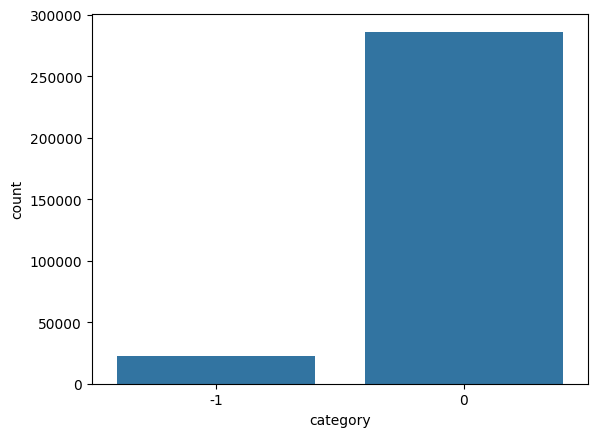

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [24]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 0    92.75
-1     7.25
Name: proportion, dtype: float64

In [25]:
df['word_count'] = df['comment_text'].apply(lambda x: len(x.split()))

In [26]:
df.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category,word_count
247507,waiting third part intro,0,0,0,0,0,0,0,4
263243,proactiv solution hi jreferee since gave go ah...,-1,-1,-1,-1,-1,-1,0,27
288438,benefit list wa wrong introduction * american ...,0,0,0,0,0,0,0,69
147482,cox word actually describing inauguration nedi...,0,0,0,0,0,0,0,9
133493,grand boucle hi maybe answer question talk gra...,0,0,0,0,0,0,0,18


In [27]:
df['word_count'].describe()

count    308489.000000
mean         35.000989
std          58.629755
min           0.000000
25%           8.000000
50%          18.000000
75%          37.000000
max        3068.000000
Name: word_count, dtype: float64

<Axes: xlabel='category', ylabel='word_count'>

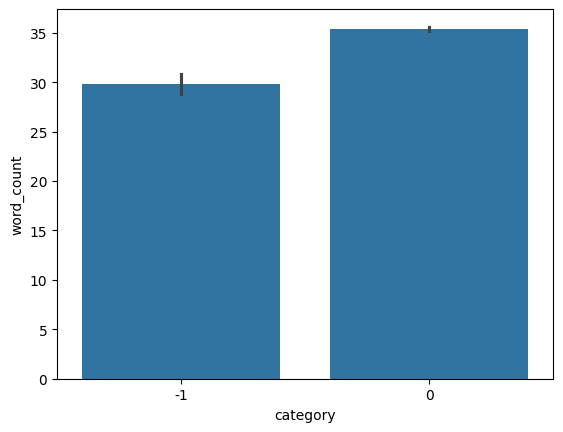

In [28]:
sns.barplot(df,x='category',y='word_count',estimator='mean')

C:\Users\Shrijeet Kumar\AppData\Local\Temp\ipykernel_14584\4112482658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


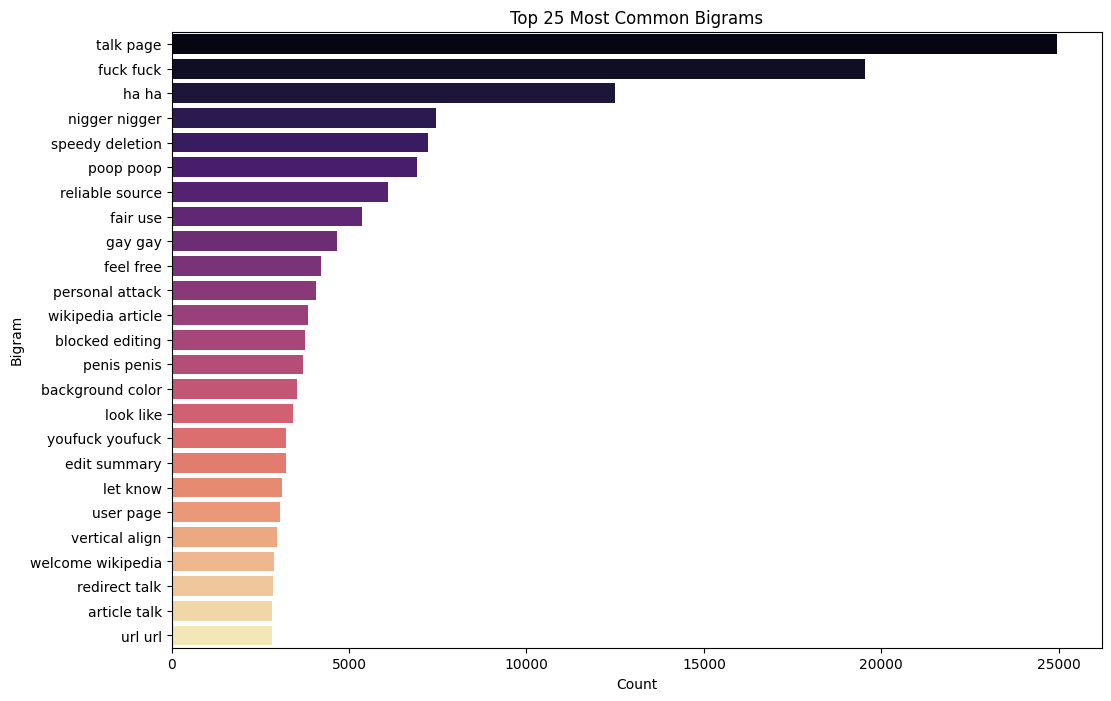

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df['comment_text'], 25)
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [30]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to C:\Users\Shrijeet
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category,word_count
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,24
1,aww ! match background colour seemingly stuck ...,0,0,0,0,0,0,0,11
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,21
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,54
4,sir hero chance remember page ?,0,0,0,0,0,0,0,6


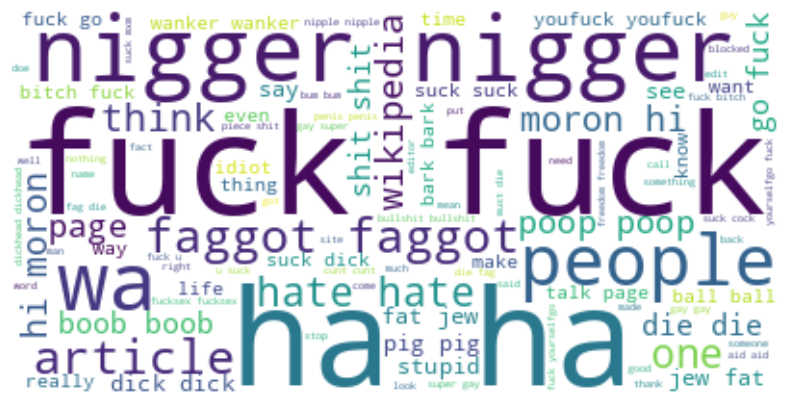

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category']==-1]['comment_text'])

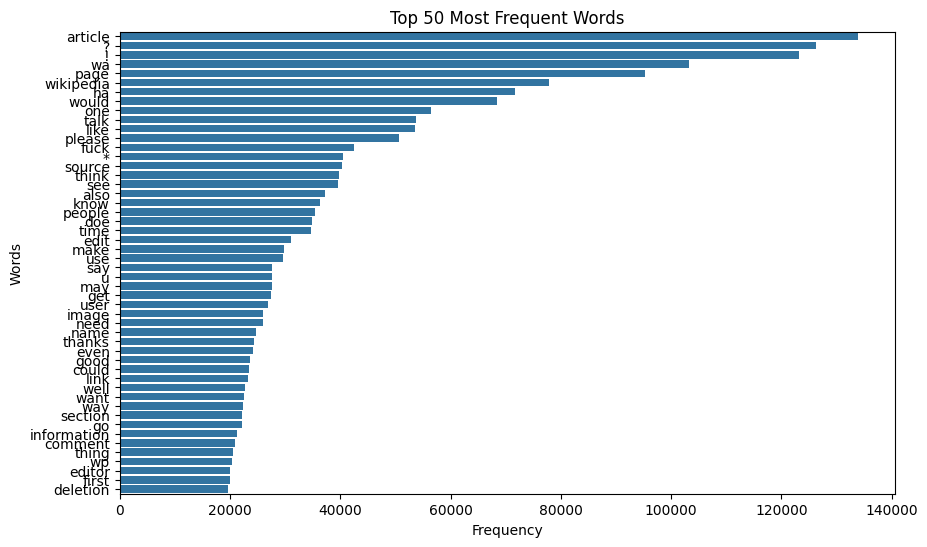

In [33]:
from collections import Counter
def plot_top_n_words(df, n=20):
    words = ' '.join(df['comment_text']).split()
    counter = Counter(words)
    most_common_words = counter.most_common(n)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
plot_top_n_words(df, n=50)

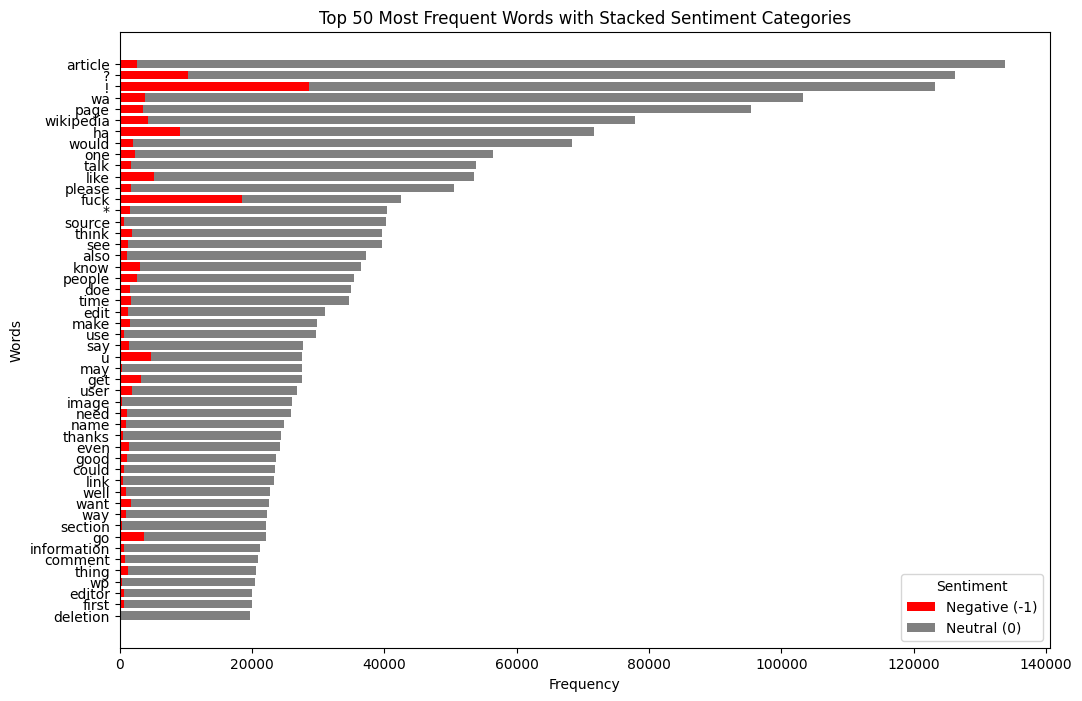

In [34]:
def plot_top_n_words_by_category(df, n=20, start=0):
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['comment_text'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0 }
            word_category_counts[word][category] += 1

    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]

    plt.figure(figsize=(12, 8))
    bar_width = 0.75
    
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_n_words_by_category(df, n=50)